## Learning Objectives

1. Simple and Multiple Linear Regression
2. Model Evaluation using Visualization
3. Polynomial Regression and Pipelines
4. R-squared and MSE for In-Sample Evaluation
5. Prediction and Decision Making

* Question
  * How can you determine a fair value for a used car?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [17]:
df.shape

(201, 29)

<h2>1. Linear Regression and Multiple Linear Regression</h2>
<h4>Linear Regression</h4>

<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>



<h4>Let's load the modules for linear regression:</h4>


$$ a:38423 \\\\ b: 821 $$
$X: 20$
Assuming $$y=38423-821 X$$ 
$y=38423 -821(20)=22.003$

The noice in a regression line follows a standard normal distribution and it's summation is zero.

**Fitting a Simple Linear Model Estimator**

1. Import linear_model from scikit-learn

In [3]:
# 1 Import linear_model from scikit-learn
from sklearn.linear_model import LinearRegression

2. Create a linear Regression Object using the constructor

In [4]:
# 2 Create a linear Regression Object using the constructor

lm = LinearRegression()
lm

LinearRegression()

3. We define the predictor variable and target variable

<h4>How could "highway-mpg" help us predict car price?</h4>

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


In [7]:
type(df[['highway-mpg']]) # Dataframe

pandas.core.frame.DataFrame

In [14]:
type(df['price']) # Series

pandas.core.series.Series

In [9]:
X = df[['highway-mpg']]
Y = df['price']

4. The use lm.fit(X,Y) to fit the model, i-e find the parameters a nd b

Fit the linear model using highway-mpg:

In [15]:
lm.fit(X,Y)

LinearRegression()

5. We Obtain a prediction

In [16]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

As seen above, the output is an array.

**SLR-Estimated Linear Model**

* We can view the intercept a

In [18]:
lm.intercept_

38423.305858157386

* We can also view the slope b

The intercept b_0 is an attribute of the object lm. The slope b_1 is also an attribute of the object lm

In [19]:
lm.coef_ # co

array([-821.73337832])

<h3>What is the final estimated linear model we get?</h3>

As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


<h4>Multiple Linear Regression</h4>

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between:

* One continuous response or target (dependent) variable (Y)
* <b>Two or more</b> predictor (independent) variables (X).
  
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \ Variable\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


The equation is given by:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


![Multiple linear Regression](Multiple_Linear_reg.png)

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [20]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [21]:
# Train the model
lm.fit(Z, df['price'])

LinearRegression()

We can also obtain a prediction

In [26]:
Yhat=lm.predict(Z)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

**MLR- Estimated Linear Model**

* Incercept a:

In [27]:
lm.intercept_

-15806.624626329198

Find the slope or Coefficients $b_1,b_2,b_3,b_4$

In [28]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [29]:
lm.coef_[0]

53.495744226049275

The Estimated Linear Model:

using Predictors $X_1,X_2,X_3,X_4$ which are ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'] respectively

In [32]:
Z["horsepower"]

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
196    114.0
197    160.0
198    134.0
199    106.0
200    114.0
Name: horsepower, Length: 201, dtype: float64

In [33]:
# ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']
Price = lm.intercept_ + lm.coef_[0] * Z["horsepower"] + lm.coef_[1] * Z["curb-weight"] + lm.coef_[2] * Z["engine-size"] + lm.coef_[3] * Z["highway-mpg"]
Price

0      13699.111612
1      13699.111612
2      19051.654702
3      10620.361930
4      15521.314202
           ...     
196    16694.400437
197    19503.679202
198    20475.458380
199    17804.038813
200    17104.075080
Length: 201, dtype: float64

<h2> 2. Model Evaluation using Visualization </h2>

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.


Import the seaborn package

In [34]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


Let's visualize **highway-mpg** as potential predictor variable of price:

(0.0, 48188.40839553691)

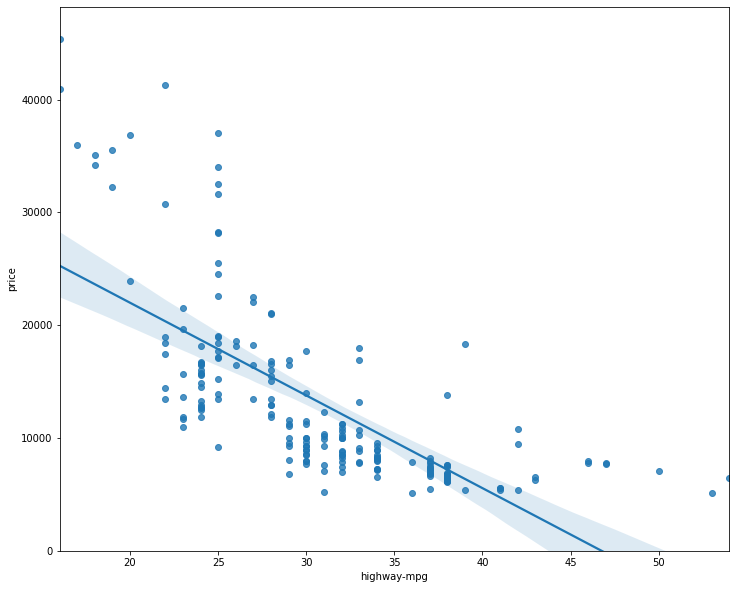

In [35]:
width= 12
height= 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


(0.0, 47414.1)

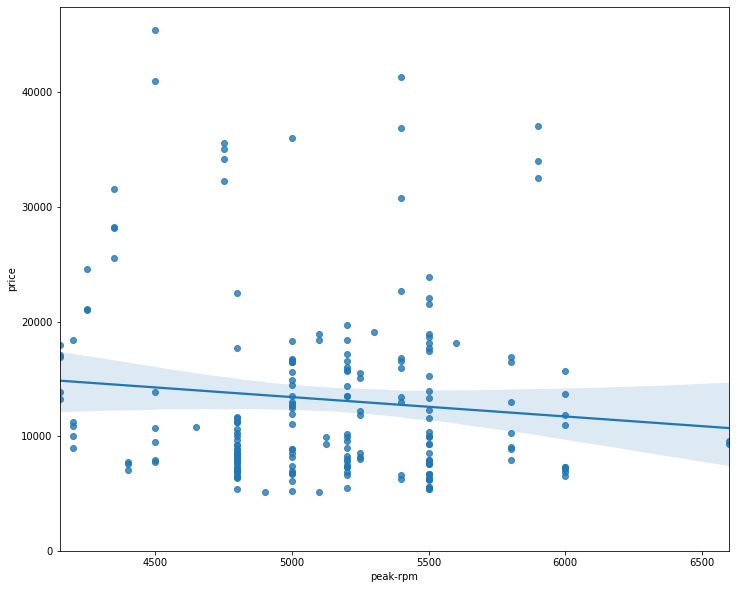

In [36]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


In [37]:
# Write your code below and press Shift+Enter to execute 
df[["peak-rpm","highway-mpg","price"]].corr()
#abs(df[["peak-rpm","highway-mpg","price"]].corr())

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


As seen above, highway-mpg is more strongly correlated with price. with negative correlation of -0.7

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


**Calculating Residuals**

![Residual Plot](Residual_Plot.png)

The residual plot represents the error between the actual value. Examining the predicted value and actual value we see a difference. We obtain that value by subtracting the predicted value, and the actual target value. We then plot that value on the vertical axis with the independent variable as the horizontal axis.

Similarly, for the second sample, we repeat the process. Subtracting the target value from the predicted value. Then plotting the value accordingly. Looking at the plot gives us some insight into our data. 

**Expected Plot**

![Expected Residual Plot](Expected_Residual_Plot.png)

We expect to see the results to have zero mean, distributed evenly around the x axis with similar variance. There is no curvature. This type of residual plot suggests a linear plot is appropriate.

**Curved Residual Plot**

![Curved Redidual Plot](Curved_Residual_Plot.png)

In this residual plot, there is a curvature. The values of the error change with x. For example, in the top left region, all the residual errors are positive. In the middle region, the residuals are negative. In the top right region, the error is large. The residuals are not randomly separated. This suggests the linear assumption is incorrect. This plot suggests a nonlinear function.

**Variance increases with increase in X Residual Plot**

![Variance increases with increase in X Residual Plot](Variance_and_X_increase_Residual.png)

In this plot, we see the variance of the residuals increases with x. Therefore, our model is incorrect.

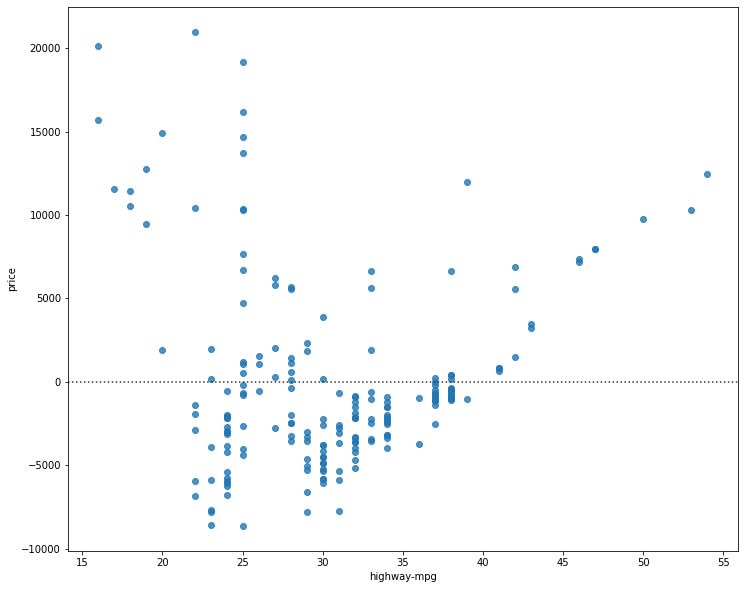

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, thus have a curvature, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

first lets make a prediction

**Distribution Plot Calculation**

![*Distribution Plot Calculation](Distribution_Plots_Calcualation.png)

We examined the vertical axis. We then count and plot the number of predicted points that are approximately equal to one. We then, count and plot the number of predicted points that are approximately equal to two. We repeat the process. For predicted points, they are approximately equal to three. Then we repeat the process for the target values. In this case, all the target values are approximately equal to two. The values of the targets and predicted values are continuous. 

**Histogram to Distribution**

![Histogram to Distribution](Histogram_to_Distribution.png)

A histogram is for discrete values. Therefore, pandas will convert them to a distribution. The vertical axis is scaled to make the area under the distribution equal to one. 

**Distribution Plot Example**

![Distribution Plot Example](Distribution_Plot_Example.png)

This is an example of using a distribution plot. The dependent variable or feature is price. The fitted values that result from the model are in blue. The actual values are in red. We see the predicted values for prices in the range from 40,000 to 50,000 are inaccurate. The prices in the region from 10,000 to 20,000 are much closer to the target value. 

In [40]:
Y_hat = lm.predict(Z)

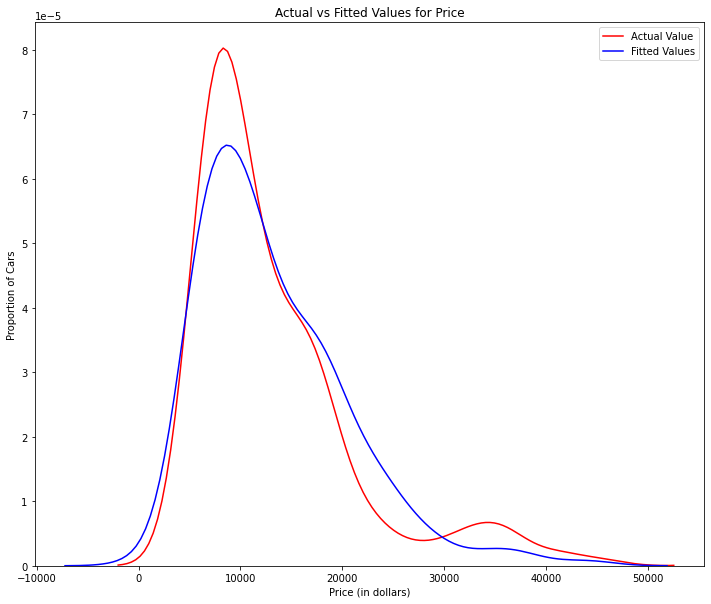

In [41]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>3. Polynomial Regression and Pipelines</h2>

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>
![Polynomial Regression](Polynomial_Regression.png)
<center><b>Quadratic - 2nd Order</b></center>

$$Yhat = a + b_1 X +b_2 X^2$$

<center><b>Cubic - 3rd Order</b></center>

$$Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\$$

<center><b>Higher-Order</b>:</center>

$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

The higher the order, the higher the variation.


In [45]:
np.linspace(15, 55, 5)

array([15., 25., 35., 45., 55.])

In [46]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


In [47]:
x = df['highway-mpg']
y = df['price']

1. Calculate Polynomial of $3^rd$ order 

In [49]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [50]:
f = np.polyfit(x,y,3)
p=np.poly1d(f)

2. We can print out the model

In [51]:
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Lets plot it

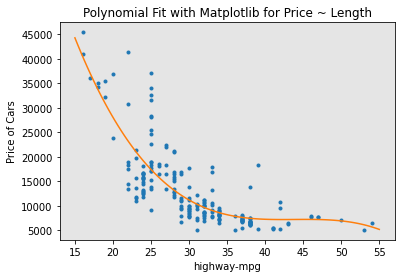

In [52]:
PlotPolly(p, x, y, 'highway-mpg')

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


**Polynomial Regression with More than One Dimesion**

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$

We can perform a polynomial transform on multiple features. First, we import the module:


In [53]:
from sklearn.preprocessing import PolynomialFeatures

# We create a <b>PolynomialFeatures</b> object of degree 2:
pr=PolynomialFeatures(degree=2,include_bias=False)

Transform the Features with fit_transform()

In [54]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [57]:
x_polly=pr.fit_transform(Z[['horsepower','curb-weight']])

In [55]:
Z[['horsepower','curb-weight']].shape

(201, 2)

In [58]:
x_polly.shape

(201, 5)

In [59]:
x_polly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]])

**More Dimensions Polynomial**

![More Dimensions Polynomial](Polynomial_More_Dimensions.png)

<h2>Pipeline</h2>

As the dimension of the data gets larger, we may want to normalize multiple features in scikit-learn. Instead we can use the preprocessing module to simplify many tasks.

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
SCALE=StandardScaler()
SCALE.fit(Z[['horsepower','highway-mpg']])
SCALE.transform(Z[['horsepower','highway-mpg']])

array([[ 0.20375448, -0.54228772],
       [ 0.20375448, -0.54228772],
       [ 1.3574159 , -0.689386  ],
       [-0.03770954, -0.10099285],
       [ 0.31107182, -1.27777915],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.9818052 , -1.57197573],
       [-0.06453888, -0.24809114],
       [-0.06453888, -0.24809114],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.83648429],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.57197573],
       [-1.48649365,  3.28226775],
       [-0.89624827,  1.81128488],
       [-0.89624827,  1.81128488],
       [-0.94990694,  1.51708831],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.41332024, -0.10099285],
       [ 1.11595188,

We can Simplify the code by using a Pipeline library

**Pipeline Steps**

![Pipeline Steps](Pipeline_Steps.png)

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [64]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:

In [65]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.


In [66]:
Z = Z.astype(float)
pipe.fit(Z,y)# Z is the predictor, while y is what we want to predict

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.

**Pipeline Prediction**

![Pipeline Prediction](Pipeline_prediction.png)

In [67]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>4. Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

$$R^2=(1-\frac{MSE \ of \ regression \ line}{MSE \ of \ the \ average \ of \ the \ data})$$

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>
<p> Falcon Miller 1992 suggests that an acceptable r squared value should be at least 0.1. </p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2:

In [68]:
X

,highway-mpg
0,27
1,27
2,26
3,30
4,22
...,...
196,28
197,25
198,23
199,27


In [69]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that \~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [70]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:

In [71]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:

In [72]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>

Let's calculate the R^2:

In [73]:
Z.columns

Index(['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'], dtype='object')

In [74]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that \~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.

We produce a prediction.

In [75]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:

In [76]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2.

Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.

In [77]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


We can say that \~67.419 % of the variation of price is explained by this polynomial fit.

<h3>MSE</h3>

In [78]:
mean_squared_error(df['price'], p(x))

20474146.42636125

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


**Prediction**

![Prediction](Prediction.png)

An increase of one unit in highway miles per gallon the value of the car decreases approximately 821 dollars. This value also seems reasonable.

In [79]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:

In [80]:
np.arange(1, 100, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [82]:
np.arange(1, 100, 1).reshape(-1, 1)[0:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [83]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model

In [84]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:

In [85]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

We can Plot the data

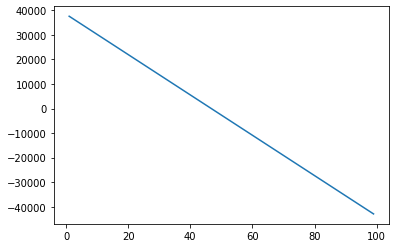

In [86]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
